# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

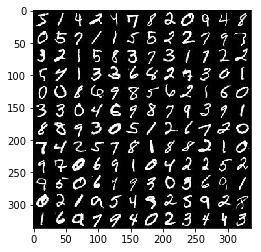

In [2]:
show_n_images = 152

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

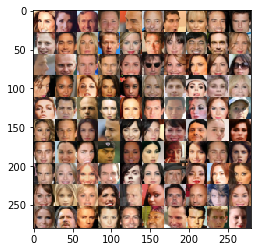

In [3]:
show_n_images = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.4.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None, image_width, image_height, image_channels])
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    lr = tf.placeholder(tf.float32, name='learning_rate')
    return input_real, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha=0.10
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        alpha=0.10
        
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28x3 now
        
        out = tf.tanh(logits)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=0.9*tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=0.9*tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=0.9*tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [26]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # Reference: https://discussions.udacity.com/t/need-help-for-mnist-training/413800
    # https://discussions.udacity.com/t/error-in-discriminator-during-training/481510
    
    # TODO: Build Model
    image_width, image_height, image_channels = data_shape[1], data_shape[2], data_shape[3]
    out_channel_dim = data_shape[3]
    
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    samples, losses = [], []
    steps = 0
    print_every=10
    show_every=100
    n_images = 36
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images*2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z, input_real: batch_images})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, out_channel_dim, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5239... Generator Loss: 3.0092
Epoch 1/2... Discriminator Loss: 1.8119... Generator Loss: 0.4001
Epoch 1/2... Discriminator Loss: 0.4455... Generator Loss: 4.3433
Epoch 1/2... Discriminator Loss: 0.4132... Generator Loss: 3.8836
Epoch 1/2... Discriminator Loss: 0.5008... Generator Loss: 2.4039
Epoch 1/2... Discriminator Loss: 0.5056... Generator Loss: 2.4742
Epoch 1/2... Discriminator Loss: 0.8881... Generator Loss: 1.3267
Epoch 1/2... Discriminator Loss: 0.5858... Generator Loss: 2.6507
Epoch 1/2... Discriminator Loss: 1.1585... Generator Loss: 1.6505
Epoch 1/2... Discriminator Loss: 1.3061... Generator Loss: 0.8773


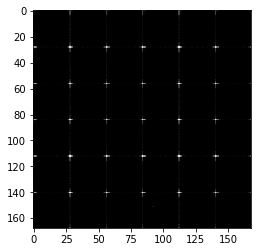

Epoch 1/2... Discriminator Loss: 1.2626... Generator Loss: 1.2828
Epoch 1/2... Discriminator Loss: 1.0578... Generator Loss: 1.0264
Epoch 1/2... Discriminator Loss: 1.3574... Generator Loss: 0.7180
Epoch 1/2... Discriminator Loss: 0.9575... Generator Loss: 1.5400
Epoch 1/2... Discriminator Loss: 1.5748... Generator Loss: 0.5374
Epoch 1/2... Discriminator Loss: 1.7201... Generator Loss: 0.4891
Epoch 1/2... Discriminator Loss: 1.5389... Generator Loss: 0.5339
Epoch 1/2... Discriminator Loss: 1.2051... Generator Loss: 0.6689
Epoch 1/2... Discriminator Loss: 1.0549... Generator Loss: 1.3021
Epoch 1/2... Discriminator Loss: 1.3442... Generator Loss: 0.6430


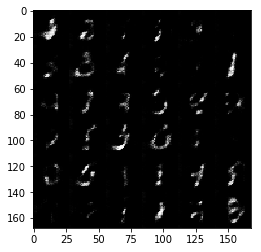

Epoch 1/2... Discriminator Loss: 1.2838... Generator Loss: 1.4363
Epoch 1/2... Discriminator Loss: 1.1882... Generator Loss: 0.8818
Epoch 1/2... Discriminator Loss: 1.1327... Generator Loss: 0.9571
Epoch 1/2... Discriminator Loss: 1.3345... Generator Loss: 0.6915
Epoch 1/2... Discriminator Loss: 1.3425... Generator Loss: 0.6993
Epoch 1/2... Discriminator Loss: 1.1681... Generator Loss: 0.9677
Epoch 1/2... Discriminator Loss: 1.5357... Generator Loss: 0.7477
Epoch 1/2... Discriminator Loss: 1.1863... Generator Loss: 0.7894
Epoch 1/2... Discriminator Loss: 1.3760... Generator Loss: 0.7637
Epoch 1/2... Discriminator Loss: 1.6492... Generator Loss: 0.4780


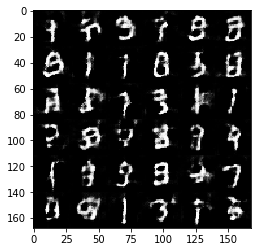

Epoch 1/2... Discriminator Loss: 1.2840... Generator Loss: 0.9282
Epoch 1/2... Discriminator Loss: 1.3159... Generator Loss: 0.7077
Epoch 1/2... Discriminator Loss: 1.2521... Generator Loss: 0.7679
Epoch 1/2... Discriminator Loss: 1.3941... Generator Loss: 0.6095
Epoch 1/2... Discriminator Loss: 1.1555... Generator Loss: 0.9801
Epoch 1/2... Discriminator Loss: 1.3286... Generator Loss: 0.7397
Epoch 1/2... Discriminator Loss: 1.3348... Generator Loss: 0.6341
Epoch 1/2... Discriminator Loss: 1.3311... Generator Loss: 0.6595
Epoch 1/2... Discriminator Loss: 1.0996... Generator Loss: 0.9207
Epoch 1/2... Discriminator Loss: 1.2131... Generator Loss: 1.1043


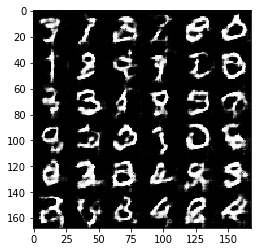

Epoch 1/2... Discriminator Loss: 1.5441... Generator Loss: 0.5332
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 0.9451
Epoch 1/2... Discriminator Loss: 1.1355... Generator Loss: 1.0967
Epoch 1/2... Discriminator Loss: 1.2902... Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.0502... Generator Loss: 1.1070
Epoch 1/2... Discriminator Loss: 1.0452... Generator Loss: 1.1741
Epoch 1/2... Discriminator Loss: 1.1440... Generator Loss: 0.7357
Epoch 1/2... Discriminator Loss: 1.1933... Generator Loss: 0.8714
Epoch 1/2... Discriminator Loss: 1.4937... Generator Loss: 0.5631
Epoch 1/2... Discriminator Loss: 1.1292... Generator Loss: 0.8197


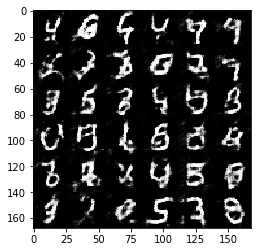

Epoch 1/2... Discriminator Loss: 1.1794... Generator Loss: 0.7597
Epoch 1/2... Discriminator Loss: 1.1507... Generator Loss: 0.8451
Epoch 1/2... Discriminator Loss: 1.0972... Generator Loss: 0.8849
Epoch 1/2... Discriminator Loss: 1.3200... Generator Loss: 0.6121
Epoch 1/2... Discriminator Loss: 1.2193... Generator Loss: 0.8653
Epoch 1/2... Discriminator Loss: 1.0822... Generator Loss: 1.0998
Epoch 1/2... Discriminator Loss: 1.2014... Generator Loss: 1.0712
Epoch 1/2... Discriminator Loss: 1.1931... Generator Loss: 1.0649
Epoch 1/2... Discriminator Loss: 1.0279... Generator Loss: 0.9197
Epoch 1/2... Discriminator Loss: 1.1625... Generator Loss: 0.8787


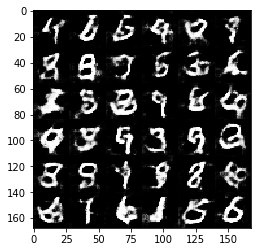

Epoch 1/2... Discriminator Loss: 1.2891... Generator Loss: 0.7840
Epoch 1/2... Discriminator Loss: 1.5085... Generator Loss: 0.5566
Epoch 1/2... Discriminator Loss: 1.0280... Generator Loss: 0.9114
Epoch 1/2... Discriminator Loss: 0.9939... Generator Loss: 1.0550
Epoch 1/2... Discriminator Loss: 0.9621... Generator Loss: 1.1867
Epoch 1/2... Discriminator Loss: 1.1655... Generator Loss: 0.8481
Epoch 1/2... Discriminator Loss: 1.2744... Generator Loss: 0.9645
Epoch 1/2... Discriminator Loss: 1.1926... Generator Loss: 0.9138
Epoch 1/2... Discriminator Loss: 1.3954... Generator Loss: 0.6308
Epoch 1/2... Discriminator Loss: 1.1785... Generator Loss: 1.1174


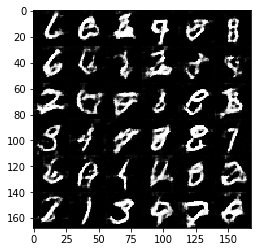

Epoch 1/2... Discriminator Loss: 1.4521... Generator Loss: 0.6422
Epoch 1/2... Discriminator Loss: 1.2152... Generator Loss: 0.9682
Epoch 1/2... Discriminator Loss: 1.3209... Generator Loss: 0.7437
Epoch 1/2... Discriminator Loss: 1.2276... Generator Loss: 0.7651
Epoch 1/2... Discriminator Loss: 1.0232... Generator Loss: 1.0572
Epoch 1/2... Discriminator Loss: 1.1201... Generator Loss: 1.6489
Epoch 1/2... Discriminator Loss: 1.2216... Generator Loss: 0.7919
Epoch 1/2... Discriminator Loss: 1.3063... Generator Loss: 0.8482
Epoch 1/2... Discriminator Loss: 1.4132... Generator Loss: 0.6431
Epoch 1/2... Discriminator Loss: 1.3451... Generator Loss: 0.7056


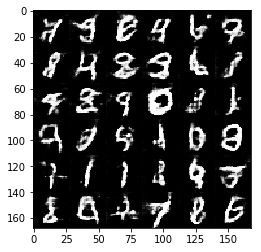

Epoch 1/2... Discriminator Loss: 0.9709... Generator Loss: 0.9995
Epoch 1/2... Discriminator Loss: 1.0626... Generator Loss: 1.2207
Epoch 1/2... Discriminator Loss: 1.2452... Generator Loss: 0.6316
Epoch 1/2... Discriminator Loss: 1.0542... Generator Loss: 0.8962
Epoch 1/2... Discriminator Loss: 1.0147... Generator Loss: 1.1895
Epoch 1/2... Discriminator Loss: 1.1570... Generator Loss: 0.8749
Epoch 1/2... Discriminator Loss: 1.1283... Generator Loss: 0.7779
Epoch 1/2... Discriminator Loss: 1.3915... Generator Loss: 0.5607
Epoch 1/2... Discriminator Loss: 1.1395... Generator Loss: 0.8235
Epoch 1/2... Discriminator Loss: 1.0268... Generator Loss: 1.2122


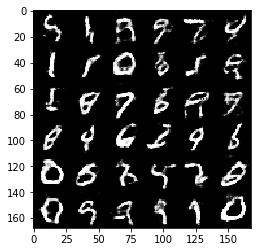

Epoch 1/2... Discriminator Loss: 1.0232... Generator Loss: 0.9478
Epoch 1/2... Discriminator Loss: 1.2125... Generator Loss: 0.7829
Epoch 1/2... Discriminator Loss: 1.3030... Generator Loss: 0.8869
Epoch 1/2... Discriminator Loss: 1.1369... Generator Loss: 1.0124
Epoch 1/2... Discriminator Loss: 1.1917... Generator Loss: 0.7371
Epoch 1/2... Discriminator Loss: 1.1110... Generator Loss: 1.2350
Epoch 1/2... Discriminator Loss: 1.2250... Generator Loss: 0.9756
Epoch 1/2... Discriminator Loss: 1.1025... Generator Loss: 1.6545
Epoch 1/2... Discriminator Loss: 1.2137... Generator Loss: 0.7103
Epoch 1/2... Discriminator Loss: 1.2232... Generator Loss: 0.9838


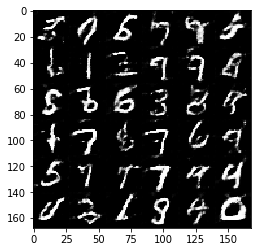

Epoch 1/2... Discriminator Loss: 1.2089... Generator Loss: 0.6329
Epoch 1/2... Discriminator Loss: 1.8469... Generator Loss: 0.4542
Epoch 1/2... Discriminator Loss: 1.1258... Generator Loss: 0.7393
Epoch 1/2... Discriminator Loss: 1.1180... Generator Loss: 0.8941
Epoch 1/2... Discriminator Loss: 1.1722... Generator Loss: 0.7453
Epoch 1/2... Discriminator Loss: 1.1559... Generator Loss: 0.7898
Epoch 1/2... Discriminator Loss: 0.9758... Generator Loss: 1.0595
Epoch 1/2... Discriminator Loss: 1.0871... Generator Loss: 0.8382
Epoch 1/2... Discriminator Loss: 1.0260... Generator Loss: 0.8896
Epoch 1/2... Discriminator Loss: 1.1555... Generator Loss: 0.9309


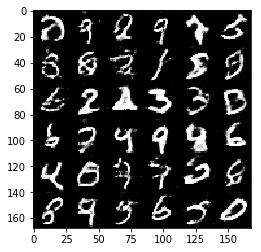

Epoch 1/2... Discriminator Loss: 1.4839... Generator Loss: 0.5532
Epoch 1/2... Discriminator Loss: 1.1011... Generator Loss: 0.8675
Epoch 1/2... Discriminator Loss: 1.1006... Generator Loss: 0.7631
Epoch 1/2... Discriminator Loss: 1.0199... Generator Loss: 0.8419
Epoch 1/2... Discriminator Loss: 1.1415... Generator Loss: 1.3071
Epoch 1/2... Discriminator Loss: 0.8584... Generator Loss: 1.1330
Epoch 1/2... Discriminator Loss: 1.7797... Generator Loss: 0.4847
Epoch 1/2... Discriminator Loss: 0.9431... Generator Loss: 0.8839
Epoch 1/2... Discriminator Loss: 1.0474... Generator Loss: 0.8390
Epoch 1/2... Discriminator Loss: 1.2164... Generator Loss: 0.7979


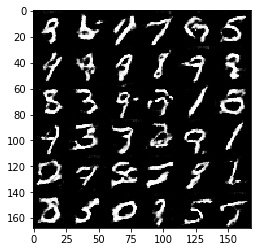

Epoch 1/2... Discriminator Loss: 0.9869... Generator Loss: 0.9804
Epoch 1/2... Discriminator Loss: 0.9332... Generator Loss: 1.1530
Epoch 1/2... Discriminator Loss: 1.0454... Generator Loss: 1.2927
Epoch 1/2... Discriminator Loss: 0.7980... Generator Loss: 1.2348
Epoch 1/2... Discriminator Loss: 1.3489... Generator Loss: 0.6132
Epoch 1/2... Discriminator Loss: 0.9869... Generator Loss: 1.2136
Epoch 1/2... Discriminator Loss: 1.3055... Generator Loss: 0.6973
Epoch 1/2... Discriminator Loss: 0.8613... Generator Loss: 1.1494
Epoch 1/2... Discriminator Loss: 1.2959... Generator Loss: 0.6850
Epoch 1/2... Discriminator Loss: 0.9053... Generator Loss: 1.6915


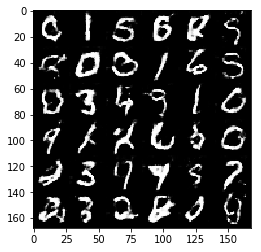

Epoch 1/2... Discriminator Loss: 0.9447... Generator Loss: 1.6896
Epoch 1/2... Discriminator Loss: 0.9963... Generator Loss: 0.9627
Epoch 1/2... Discriminator Loss: 1.0818... Generator Loss: 1.2707
Epoch 1/2... Discriminator Loss: 1.0680... Generator Loss: 0.8510
Epoch 1/2... Discriminator Loss: 1.0165... Generator Loss: 0.8445
Epoch 1/2... Discriminator Loss: 1.5395... Generator Loss: 0.5388
Epoch 1/2... Discriminator Loss: 1.0536... Generator Loss: 0.7823
Epoch 1/2... Discriminator Loss: 0.9547... Generator Loss: 0.9066
Epoch 1/2... Discriminator Loss: 0.9188... Generator Loss: 1.0134
Epoch 1/2... Discriminator Loss: 1.8346... Generator Loss: 0.4451


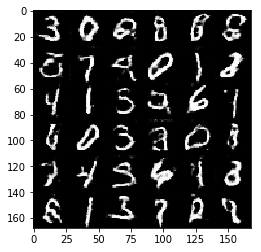

Epoch 1/2... Discriminator Loss: 0.8311... Generator Loss: 1.6548
Epoch 1/2... Discriminator Loss: 0.8082... Generator Loss: 1.2604
Epoch 1/2... Discriminator Loss: 0.8513... Generator Loss: 1.3549
Epoch 1/2... Discriminator Loss: 0.8016... Generator Loss: 1.5515
Epoch 1/2... Discriminator Loss: 1.3220... Generator Loss: 0.5869
Epoch 1/2... Discriminator Loss: 0.8206... Generator Loss: 1.5869
Epoch 1/2... Discriminator Loss: 1.4415... Generator Loss: 0.5644
Epoch 1/2... Discriminator Loss: 0.9074... Generator Loss: 0.9965
Epoch 1/2... Discriminator Loss: 1.4755... Generator Loss: 0.5560
Epoch 1/2... Discriminator Loss: 1.0537... Generator Loss: 1.5887


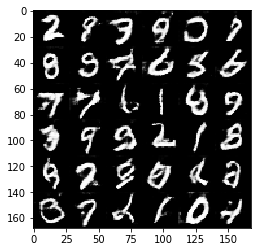

Epoch 1/2... Discriminator Loss: 1.4515... Generator Loss: 0.5585
Epoch 1/2... Discriminator Loss: 0.8244... Generator Loss: 1.3897
Epoch 1/2... Discriminator Loss: 0.9524... Generator Loss: 0.9168
Epoch 1/2... Discriminator Loss: 0.7701... Generator Loss: 1.2417
Epoch 1/2... Discriminator Loss: 0.7571... Generator Loss: 1.1995
Epoch 1/2... Discriminator Loss: 2.5871... Generator Loss: 4.2892
Epoch 1/2... Discriminator Loss: 0.9385... Generator Loss: 1.0203
Epoch 1/2... Discriminator Loss: 1.1362... Generator Loss: 0.8117
Epoch 1/2... Discriminator Loss: 0.8517... Generator Loss: 1.2017
Epoch 1/2... Discriminator Loss: 1.2454... Generator Loss: 0.7211


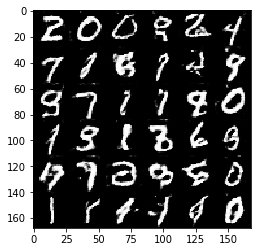

Epoch 1/2... Discriminator Loss: 1.1548... Generator Loss: 0.7117
Epoch 1/2... Discriminator Loss: 1.2127... Generator Loss: 0.6700
Epoch 1/2... Discriminator Loss: 0.8799... Generator Loss: 1.1497
Epoch 1/2... Discriminator Loss: 1.6411... Generator Loss: 0.5665
Epoch 1/2... Discriminator Loss: 0.6543... Generator Loss: 1.6484
Epoch 1/2... Discriminator Loss: 0.9786... Generator Loss: 0.9208
Epoch 1/2... Discriminator Loss: 1.4106... Generator Loss: 0.5590
Epoch 1/2... Discriminator Loss: 0.8070... Generator Loss: 1.1355
Epoch 1/2... Discriminator Loss: 1.0165... Generator Loss: 1.1010
Epoch 1/2... Discriminator Loss: 0.8380... Generator Loss: 1.1932


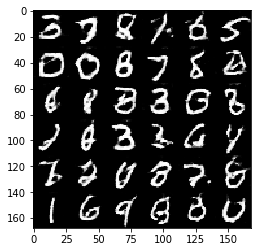

Epoch 1/2... Discriminator Loss: 0.9647... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 1.1607... Generator Loss: 0.8149
Epoch 1/2... Discriminator Loss: 0.9271... Generator Loss: 1.0011
Epoch 1/2... Discriminator Loss: 0.9666... Generator Loss: 1.1032
Epoch 1/2... Discriminator Loss: 0.8120... Generator Loss: 1.2910
Epoch 1/2... Discriminator Loss: 1.2715... Generator Loss: 0.6982
Epoch 1/2... Discriminator Loss: 0.9810... Generator Loss: 0.8555
Epoch 1/2... Discriminator Loss: 0.7301... Generator Loss: 1.4937
Epoch 1/2... Discriminator Loss: 0.6928... Generator Loss: 1.5260
Epoch 1/2... Discriminator Loss: 0.6414... Generator Loss: 1.6692


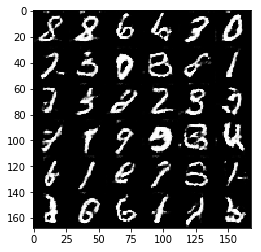

Epoch 1/2... Discriminator Loss: 1.0538... Generator Loss: 1.8342
Epoch 1/2... Discriminator Loss: 0.9038... Generator Loss: 1.0913
Epoch 1/2... Discriminator Loss: 0.8963... Generator Loss: 1.2290
Epoch 1/2... Discriminator Loss: 1.0826... Generator Loss: 1.1467
Epoch 1/2... Discriminator Loss: 1.1821... Generator Loss: 0.7318
Epoch 1/2... Discriminator Loss: 0.8944... Generator Loss: 1.1844
Epoch 1/2... Discriminator Loss: 0.9495... Generator Loss: 0.9493
Epoch 2/2... Discriminator Loss: 0.8233... Generator Loss: 1.5721
Epoch 2/2... Discriminator Loss: 1.4011... Generator Loss: 0.6298
Epoch 2/2... Discriminator Loss: 1.0239... Generator Loss: 1.0130


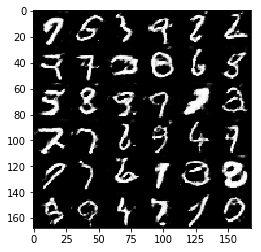

Epoch 2/2... Discriminator Loss: 0.8129... Generator Loss: 1.6111
Epoch 2/2... Discriminator Loss: 0.8340... Generator Loss: 1.2049
Epoch 2/2... Discriminator Loss: 0.9510... Generator Loss: 0.9895
Epoch 2/2... Discriminator Loss: 0.8608... Generator Loss: 0.9943
Epoch 2/2... Discriminator Loss: 0.8670... Generator Loss: 1.0059
Epoch 2/2... Discriminator Loss: 1.2428... Generator Loss: 0.6411
Epoch 2/2... Discriminator Loss: 1.3328... Generator Loss: 0.6069
Epoch 2/2... Discriminator Loss: 0.9071... Generator Loss: 1.0219
Epoch 2/2... Discriminator Loss: 0.7660... Generator Loss: 1.3193
Epoch 2/2... Discriminator Loss: 0.8300... Generator Loss: 2.0151


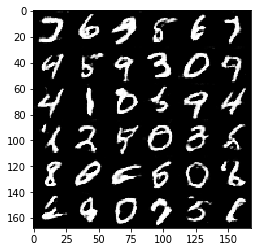

Epoch 2/2... Discriminator Loss: 0.7877... Generator Loss: 1.2329
Epoch 2/2... Discriminator Loss: 0.6659... Generator Loss: 1.6130
Epoch 2/2... Discriminator Loss: 1.3963... Generator Loss: 0.6342
Epoch 2/2... Discriminator Loss: 0.7285... Generator Loss: 1.6159
Epoch 2/2... Discriminator Loss: 0.8469... Generator Loss: 1.2305
Epoch 2/2... Discriminator Loss: 0.7115... Generator Loss: 1.4463
Epoch 2/2... Discriminator Loss: 0.8282... Generator Loss: 1.0325
Epoch 2/2... Discriminator Loss: 0.9030... Generator Loss: 0.9476
Epoch 2/2... Discriminator Loss: 1.0975... Generator Loss: 0.7651
Epoch 2/2... Discriminator Loss: 0.8919... Generator Loss: 1.0650


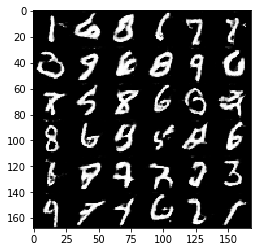

Epoch 2/2... Discriminator Loss: 1.2894... Generator Loss: 0.6728
Epoch 2/2... Discriminator Loss: 0.6657... Generator Loss: 1.5221
Epoch 2/2... Discriminator Loss: 0.7253... Generator Loss: 1.3600
Epoch 2/2... Discriminator Loss: 0.7166... Generator Loss: 1.5856
Epoch 2/2... Discriminator Loss: 1.2263... Generator Loss: 0.7719
Epoch 2/2... Discriminator Loss: 1.1691... Generator Loss: 0.8332
Epoch 2/2... Discriminator Loss: 2.3477... Generator Loss: 0.4709
Epoch 2/2... Discriminator Loss: 0.9217... Generator Loss: 1.1885
Epoch 2/2... Discriminator Loss: 0.7271... Generator Loss: 2.1797
Epoch 2/2... Discriminator Loss: 0.9981... Generator Loss: 0.8388


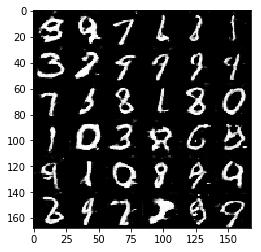

Epoch 2/2... Discriminator Loss: 0.6592... Generator Loss: 1.5855
Epoch 2/2... Discriminator Loss: 0.6400... Generator Loss: 1.6778
Epoch 2/2... Discriminator Loss: 0.7400... Generator Loss: 1.5658
Epoch 2/2... Discriminator Loss: 1.0866... Generator Loss: 0.8761
Epoch 2/2... Discriminator Loss: 0.7326... Generator Loss: 1.2789
Epoch 2/2... Discriminator Loss: 0.6658... Generator Loss: 1.9187
Epoch 2/2... Discriminator Loss: 1.0441... Generator Loss: 0.8750
Epoch 2/2... Discriminator Loss: 0.5388... Generator Loss: 2.5374
Epoch 2/2... Discriminator Loss: 0.8478... Generator Loss: 1.0679
Epoch 2/2... Discriminator Loss: 0.7202... Generator Loss: 1.7682


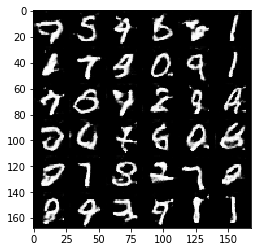

Epoch 2/2... Discriminator Loss: 1.0512... Generator Loss: 0.8186
Epoch 2/2... Discriminator Loss: 1.5243... Generator Loss: 0.5565
Epoch 2/2... Discriminator Loss: 0.8987... Generator Loss: 0.9576
Epoch 2/2... Discriminator Loss: 0.9003... Generator Loss: 1.0773
Epoch 2/2... Discriminator Loss: 0.7142... Generator Loss: 1.3789
Epoch 2/2... Discriminator Loss: 1.0356... Generator Loss: 0.8734
Epoch 2/2... Discriminator Loss: 0.8528... Generator Loss: 1.1319
Epoch 2/2... Discriminator Loss: 1.4160... Generator Loss: 0.6782
Epoch 2/2... Discriminator Loss: 0.9108... Generator Loss: 0.9754
Epoch 2/2... Discriminator Loss: 0.8114... Generator Loss: 1.0819


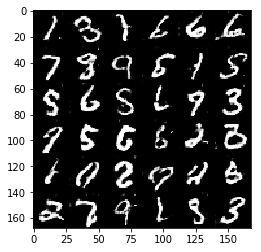

Epoch 2/2... Discriminator Loss: 0.8340... Generator Loss: 1.0890
Epoch 2/2... Discriminator Loss: 0.7068... Generator Loss: 2.2011
Epoch 2/2... Discriminator Loss: 0.7065... Generator Loss: 1.4131
Epoch 2/2... Discriminator Loss: 1.3048... Generator Loss: 0.7854
Epoch 2/2... Discriminator Loss: 1.3238... Generator Loss: 0.6972
Epoch 2/2... Discriminator Loss: 1.1282... Generator Loss: 0.7713
Epoch 2/2... Discriminator Loss: 0.8744... Generator Loss: 1.1538
Epoch 2/2... Discriminator Loss: 0.6286... Generator Loss: 1.5691
Epoch 2/2... Discriminator Loss: 0.7385... Generator Loss: 1.1928
Epoch 2/2... Discriminator Loss: 1.4129... Generator Loss: 0.6564


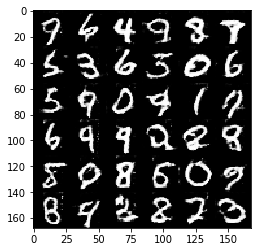

Epoch 2/2... Discriminator Loss: 0.6792... Generator Loss: 1.5613
Epoch 2/2... Discriminator Loss: 0.5893... Generator Loss: 1.8254
Epoch 2/2... Discriminator Loss: 0.8073... Generator Loss: 1.3200
Epoch 2/2... Discriminator Loss: 0.8627... Generator Loss: 1.1952
Epoch 2/2... Discriminator Loss: 1.2882... Generator Loss: 0.6981
Epoch 2/2... Discriminator Loss: 1.0220... Generator Loss: 1.0916
Epoch 2/2... Discriminator Loss: 1.0384... Generator Loss: 0.9032
Epoch 2/2... Discriminator Loss: 0.9898... Generator Loss: 0.8761
Epoch 2/2... Discriminator Loss: 1.1895... Generator Loss: 0.6878
Epoch 2/2... Discriminator Loss: 0.7489... Generator Loss: 1.2300


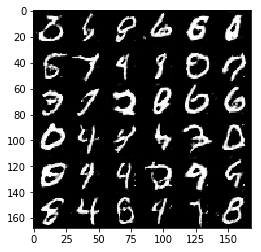

Epoch 2/2... Discriminator Loss: 0.7568... Generator Loss: 1.2197
Epoch 2/2... Discriminator Loss: 0.6978... Generator Loss: 1.3569
Epoch 2/2... Discriminator Loss: 0.7271... Generator Loss: 1.3591
Epoch 2/2... Discriminator Loss: 1.2885... Generator Loss: 0.7363
Epoch 2/2... Discriminator Loss: 1.2328... Generator Loss: 0.6704
Epoch 2/2... Discriminator Loss: 0.7543... Generator Loss: 1.2064
Epoch 2/2... Discriminator Loss: 1.4711... Generator Loss: 0.6147
Epoch 2/2... Discriminator Loss: 0.7492... Generator Loss: 1.4641
Epoch 2/2... Discriminator Loss: 0.5843... Generator Loss: 1.7876
Epoch 2/2... Discriminator Loss: 1.0666... Generator Loss: 0.8754


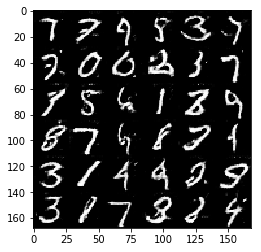

Epoch 2/2... Discriminator Loss: 0.5026... Generator Loss: 2.2964
Epoch 2/2... Discriminator Loss: 0.8802... Generator Loss: 1.1059
Epoch 2/2... Discriminator Loss: 1.8755... Generator Loss: 0.4898
Epoch 2/2... Discriminator Loss: 0.8332... Generator Loss: 1.1271
Epoch 2/2... Discriminator Loss: 0.5224... Generator Loss: 1.9184
Epoch 2/2... Discriminator Loss: 0.8412... Generator Loss: 1.0967
Epoch 2/2... Discriminator Loss: 1.8334... Generator Loss: 0.4993
Epoch 2/2... Discriminator Loss: 0.7084... Generator Loss: 2.0102
Epoch 2/2... Discriminator Loss: 0.7949... Generator Loss: 1.1698
Epoch 2/2... Discriminator Loss: 0.9482... Generator Loss: 0.8945


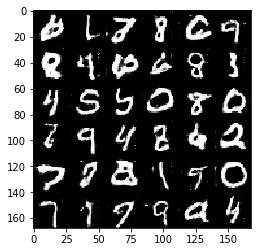

Epoch 2/2... Discriminator Loss: 0.6132... Generator Loss: 2.5184
Epoch 2/2... Discriminator Loss: 0.8305... Generator Loss: 1.1145
Epoch 2/2... Discriminator Loss: 0.5390... Generator Loss: 1.8684
Epoch 2/2... Discriminator Loss: 0.9435... Generator Loss: 1.3689
Epoch 2/2... Discriminator Loss: 0.7900... Generator Loss: 1.1541
Epoch 2/2... Discriminator Loss: 1.3208... Generator Loss: 0.6049
Epoch 2/2... Discriminator Loss: 0.7740... Generator Loss: 1.2480
Epoch 2/2... Discriminator Loss: 0.6764... Generator Loss: 1.6984
Epoch 2/2... Discriminator Loss: 0.5904... Generator Loss: 1.5934
Epoch 2/2... Discriminator Loss: 0.7689... Generator Loss: 1.2980


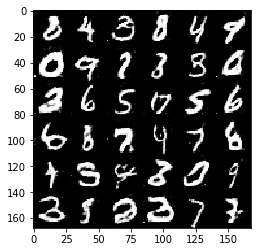

Epoch 2/2... Discriminator Loss: 0.6948... Generator Loss: 1.6239
Epoch 2/2... Discriminator Loss: 0.9408... Generator Loss: 0.9384
Epoch 2/2... Discriminator Loss: 0.7416... Generator Loss: 1.2962
Epoch 2/2... Discriminator Loss: 0.8767... Generator Loss: 1.1539
Epoch 2/2... Discriminator Loss: 0.5813... Generator Loss: 1.7922
Epoch 2/2... Discriminator Loss: 0.6912... Generator Loss: 1.5176
Epoch 2/2... Discriminator Loss: 1.0744... Generator Loss: 2.8153
Epoch 2/2... Discriminator Loss: 0.8086... Generator Loss: 1.3297
Epoch 2/2... Discriminator Loss: 0.8864... Generator Loss: 1.0968
Epoch 2/2... Discriminator Loss: 0.9299... Generator Loss: 1.3694


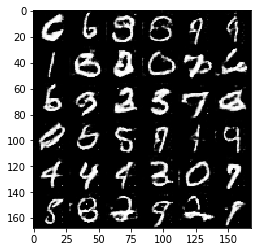

Epoch 2/2... Discriminator Loss: 1.6174... Generator Loss: 0.5522
Epoch 2/2... Discriminator Loss: 0.8441... Generator Loss: 1.1295
Epoch 2/2... Discriminator Loss: 0.9630... Generator Loss: 0.9771
Epoch 2/2... Discriminator Loss: 1.2038... Generator Loss: 0.7361
Epoch 2/2... Discriminator Loss: 0.6779... Generator Loss: 1.4379
Epoch 2/2... Discriminator Loss: 0.5635... Generator Loss: 2.1230
Epoch 2/2... Discriminator Loss: 0.6133... Generator Loss: 1.6008
Epoch 2/2... Discriminator Loss: 0.7170... Generator Loss: 1.4816
Epoch 2/2... Discriminator Loss: 1.3432... Generator Loss: 0.7122
Epoch 2/2... Discriminator Loss: 0.5985... Generator Loss: 1.8461


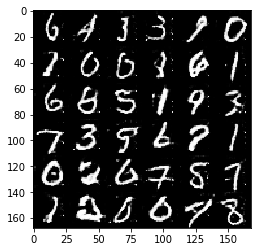

Epoch 2/2... Discriminator Loss: 0.6117... Generator Loss: 1.6955
Epoch 2/2... Discriminator Loss: 0.7006... Generator Loss: 1.3487
Epoch 2/2... Discriminator Loss: 0.9295... Generator Loss: 1.0435
Epoch 2/2... Discriminator Loss: 1.0199... Generator Loss: 0.9247
Epoch 2/2... Discriminator Loss: 0.7643... Generator Loss: 1.1825
Epoch 2/2... Discriminator Loss: 0.7283... Generator Loss: 1.2441
Epoch 2/2... Discriminator Loss: 0.7107... Generator Loss: 1.2862
Epoch 2/2... Discriminator Loss: 0.7237... Generator Loss: 1.7524
Epoch 2/2... Discriminator Loss: 0.6831... Generator Loss: 1.6488
Epoch 2/2... Discriminator Loss: 0.6654... Generator Loss: 2.0571


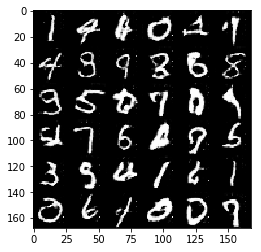

Epoch 2/2... Discriminator Loss: 0.7555... Generator Loss: 1.2930
Epoch 2/2... Discriminator Loss: 0.6564... Generator Loss: 2.1531
Epoch 2/2... Discriminator Loss: 1.2293... Generator Loss: 0.7235
Epoch 2/2... Discriminator Loss: 0.6369... Generator Loss: 2.1605
Epoch 2/2... Discriminator Loss: 0.6816... Generator Loss: 2.1253
Epoch 2/2... Discriminator Loss: 0.6266... Generator Loss: 1.6318
Epoch 2/2... Discriminator Loss: 0.9210... Generator Loss: 0.9931
Epoch 2/2... Discriminator Loss: 0.6763... Generator Loss: 1.7134
Epoch 2/2... Discriminator Loss: 0.7849... Generator Loss: 1.1589
Epoch 2/2... Discriminator Loss: 0.7657... Generator Loss: 1.2032


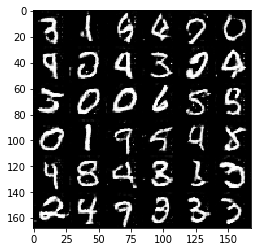

Epoch 2/2... Discriminator Loss: 0.6614... Generator Loss: 1.3677
Epoch 2/2... Discriminator Loss: 0.5481... Generator Loss: 1.8795
Epoch 2/2... Discriminator Loss: 2.6466... Generator Loss: 4.5181
Epoch 2/2... Discriminator Loss: 0.7138... Generator Loss: 1.7238
Epoch 2/2... Discriminator Loss: 0.7978... Generator Loss: 1.1433
Epoch 2/2... Discriminator Loss: 0.6903... Generator Loss: 1.4149
Epoch 2/2... Discriminator Loss: 0.9847... Generator Loss: 0.9025
Epoch 2/2... Discriminator Loss: 0.7444... Generator Loss: 1.3418
Epoch 2/2... Discriminator Loss: 0.5872... Generator Loss: 1.9913
Epoch 2/2... Discriminator Loss: 1.0550... Generator Loss: 0.8339


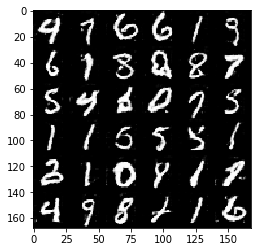

Epoch 2/2... Discriminator Loss: 0.8683... Generator Loss: 2.0951
Epoch 2/2... Discriminator Loss: 0.9525... Generator Loss: 0.9169
Epoch 2/2... Discriminator Loss: 0.8160... Generator Loss: 1.1364
Epoch 2/2... Discriminator Loss: 1.1220... Generator Loss: 0.7964
Epoch 2/2... Discriminator Loss: 1.4706... Generator Loss: 0.6313
Epoch 2/2... Discriminator Loss: 0.6429... Generator Loss: 1.4507
Epoch 2/2... Discriminator Loss: 1.0009... Generator Loss: 0.9020
Epoch 2/2... Discriminator Loss: 0.6029... Generator Loss: 1.7081
Epoch 2/2... Discriminator Loss: 0.6741... Generator Loss: 1.8017
Epoch 2/2... Discriminator Loss: 1.7159... Generator Loss: 0.7071


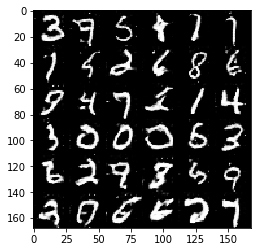

Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 0.8726
Epoch 2/2... Discriminator Loss: 0.6289... Generator Loss: 1.6768
Epoch 2/2... Discriminator Loss: 0.6947... Generator Loss: 1.3486
Epoch 2/2... Discriminator Loss: 0.7365... Generator Loss: 1.3151
Epoch 2/2... Discriminator Loss: 0.7008... Generator Loss: 1.2956
Epoch 2/2... Discriminator Loss: 0.6581... Generator Loss: 1.5816
Epoch 2/2... Discriminator Loss: 1.2632... Generator Loss: 0.7889
Epoch 2/2... Discriminator Loss: 0.7030... Generator Loss: 1.3682
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 1.8867
Epoch 2/2... Discriminator Loss: 0.6702... Generator Loss: 1.4774


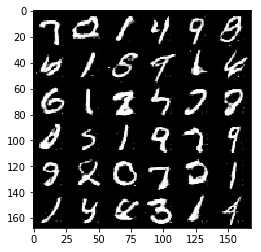

Epoch 2/2... Discriminator Loss: 0.6462... Generator Loss: 1.4544
Epoch 2/2... Discriminator Loss: 0.7904... Generator Loss: 1.5227
Epoch 2/2... Discriminator Loss: 0.6773... Generator Loss: 1.4415
Epoch 2/2... Discriminator Loss: 0.9549... Generator Loss: 0.9387
Epoch 2/2... Discriminator Loss: 0.5590... Generator Loss: 1.9186
Epoch 2/2... Discriminator Loss: 0.8096... Generator Loss: 1.2211
Epoch 2/2... Discriminator Loss: 1.4895... Generator Loss: 2.8775
Epoch 2/2... Discriminator Loss: 1.4671... Generator Loss: 0.5793
Epoch 2/2... Discriminator Loss: 1.2337... Generator Loss: 0.7035
Epoch 2/2... Discriminator Loss: 0.9076... Generator Loss: 1.1390


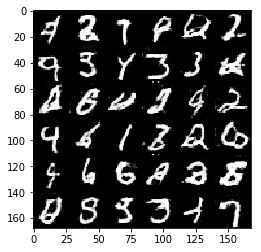

Epoch 2/2... Discriminator Loss: 0.6271... Generator Loss: 2.5114
Epoch 2/2... Discriminator Loss: 0.8871... Generator Loss: 0.9429
Epoch 2/2... Discriminator Loss: 0.9155... Generator Loss: 0.9765
Epoch 2/2... Discriminator Loss: 0.6310... Generator Loss: 1.5331
Epoch 2/2... Discriminator Loss: 0.5477... Generator Loss: 1.9186


In [27]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4472... Generator Loss: 5.1388
Epoch 1/1... Discriminator Loss: 0.5557... Generator Loss: 6.4127
Epoch 1/1... Discriminator Loss: 1.8046... Generator Loss: 0.4623
Epoch 1/1... Discriminator Loss: 0.5530... Generator Loss: 4.5879
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 2.8517
Epoch 1/1... Discriminator Loss: 1.1142... Generator Loss: 0.8550
Epoch 1/1... Discriminator Loss: 0.9497... Generator Loss: 1.3825
Epoch 1/1... Discriminator Loss: 2.2082... Generator Loss: 0.3901
Epoch 1/1... Discriminator Loss: 1.5049... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 1.4173


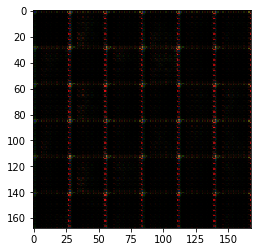

Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 0.8711... Generator Loss: 1.3080
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 1.7766... Generator Loss: 0.5315
Epoch 1/1... Discriminator Loss: 1.0358... Generator Loss: 1.2840
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.1155... Generator Loss: 1.0490
Epoch 1/1... Discriminator Loss: 1.5346... Generator Loss: 1.1162
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.6755
Epoch 1/1... Discriminator Loss: 1.1815... Generator Loss: 1.0136


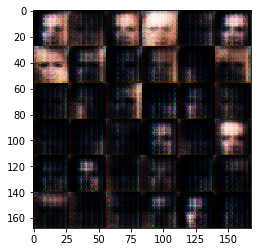

Epoch 1/1... Discriminator Loss: 1.1983... Generator Loss: 0.9990
Epoch 1/1... Discriminator Loss: 1.8663... Generator Loss: 3.3383
Epoch 1/1... Discriminator Loss: 2.0597... Generator Loss: 0.3891
Epoch 1/1... Discriminator Loss: 1.4523... Generator Loss: 0.6709
Epoch 1/1... Discriminator Loss: 1.7064... Generator Loss: 0.4392
Epoch 1/1... Discriminator Loss: 2.1590... Generator Loss: 2.4648
Epoch 1/1... Discriminator Loss: 1.1847... Generator Loss: 0.8819
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.9414
Epoch 1/1... Discriminator Loss: 1.0564... Generator Loss: 1.4238
Epoch 1/1... Discriminator Loss: 1.0911... Generator Loss: 1.3405


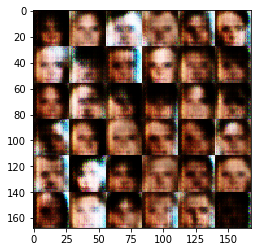

Epoch 1/1... Discriminator Loss: 2.0799... Generator Loss: 0.3795
Epoch 1/1... Discriminator Loss: 1.0533... Generator Loss: 0.8813
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 1.3018
Epoch 1/1... Discriminator Loss: 1.4742... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.3826
Epoch 1/1... Discriminator Loss: 1.5871... Generator Loss: 2.3361
Epoch 1/1... Discriminator Loss: 1.0744... Generator Loss: 0.9045
Epoch 1/1... Discriminator Loss: 1.1389... Generator Loss: 1.8023
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.7296
Epoch 1/1... Discriminator Loss: 0.9693... Generator Loss: 2.1340


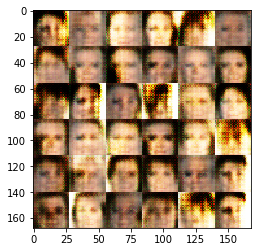

Epoch 1/1... Discriminator Loss: 1.0957... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 0.9869
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 0.9594
Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 1.0893
Epoch 1/1... Discriminator Loss: 1.3207... Generator Loss: 0.7525
Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.7143
Epoch 1/1... Discriminator Loss: 1.4355... Generator Loss: 0.7277
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.8117
Epoch 1/1... Discriminator Loss: 1.4879... Generator Loss: 0.5592
Epoch 1/1... Discriminator Loss: 1.2746... Generator Loss: 1.3691


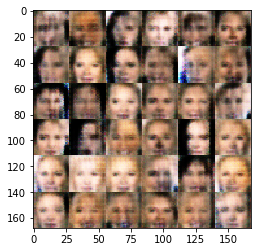

Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.8682
Epoch 1/1... Discriminator Loss: 0.9355... Generator Loss: 1.0160
Epoch 1/1... Discriminator Loss: 1.4679... Generator Loss: 0.5223
Epoch 1/1... Discriminator Loss: 1.4637... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.1709... Generator Loss: 1.1689
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.7064
Epoch 1/1... Discriminator Loss: 1.1972... Generator Loss: 1.1192
Epoch 1/1... Discriminator Loss: 1.3290... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 0.8747... Generator Loss: 1.7562
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 0.9882


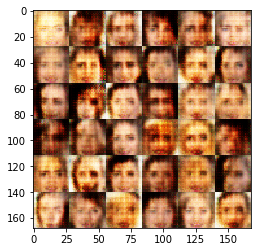

Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 0.9935
Epoch 1/1... Discriminator Loss: 1.0909... Generator Loss: 0.9805
Epoch 1/1... Discriminator Loss: 1.5249... Generator Loss: 0.6252
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 1.4351
Epoch 1/1... Discriminator Loss: 1.3517... Generator Loss: 0.8246
Epoch 1/1... Discriminator Loss: 1.1403... Generator Loss: 0.8229
Epoch 1/1... Discriminator Loss: 1.5047... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 1.1200... Generator Loss: 0.9525
Epoch 1/1... Discriminator Loss: 1.3823... Generator Loss: 0.7889


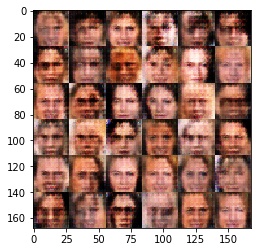

Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.8203
Epoch 1/1... Discriminator Loss: 1.4620... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.0337... Generator Loss: 1.0949
Epoch 1/1... Discriminator Loss: 1.3584... Generator Loss: 0.9273
Epoch 1/1... Discriminator Loss: 1.2078... Generator Loss: 1.0886
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 0.8644
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.8550
Epoch 1/1... Discriminator Loss: 0.8508... Generator Loss: 1.5935
Epoch 1/1... Discriminator Loss: 0.8883... Generator Loss: 1.8356
Epoch 1/1... Discriminator Loss: 1.2083... Generator Loss: 0.7652


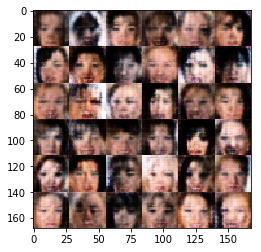

Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 1.1279
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.4440... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.8475
Epoch 1/1... Discriminator Loss: 1.4094... Generator Loss: 0.7605
Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 1.0945
Epoch 1/1... Discriminator Loss: 1.4452... Generator Loss: 0.7609
Epoch 1/1... Discriminator Loss: 1.3230... Generator Loss: 0.7484
Epoch 1/1... Discriminator Loss: 1.4372... Generator Loss: 0.5728
Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 0.7146


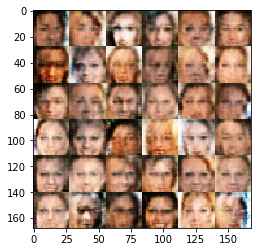

Epoch 1/1... Discriminator Loss: 1.4431... Generator Loss: 0.5488
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 1.7413... Generator Loss: 0.5708
Epoch 1/1... Discriminator Loss: 1.2022... Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.6490... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 1.4131... Generator Loss: 0.7128
Epoch 1/1... Discriminator Loss: 1.2119... Generator Loss: 0.7714
Epoch 1/1... Discriminator Loss: 1.0264... Generator Loss: 1.0592
Epoch 1/1... Discriminator Loss: 1.2739... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.7798


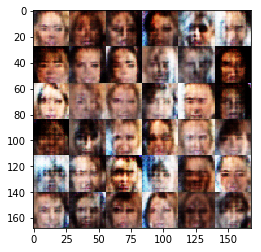

Epoch 1/1... Discriminator Loss: 1.0611... Generator Loss: 0.9361
Epoch 1/1... Discriminator Loss: 1.2921... Generator Loss: 0.7223
Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.7101
Epoch 1/1... Discriminator Loss: 1.3454... Generator Loss: 1.0173
Epoch 1/1... Discriminator Loss: 1.1913... Generator Loss: 0.8291
Epoch 1/1... Discriminator Loss: 1.1965... Generator Loss: 0.7714
Epoch 1/1... Discriminator Loss: 1.3337... Generator Loss: 1.1095
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 1.4372... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.7734


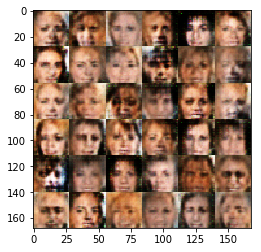

Epoch 1/1... Discriminator Loss: 1.2442... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.5259... Generator Loss: 0.7896
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.5558... Generator Loss: 0.5614
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 1.9963
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.5735
Epoch 1/1... Discriminator Loss: 1.4200... Generator Loss: 0.7713
Epoch 1/1... Discriminator Loss: 1.3334... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.1602... Generator Loss: 0.9138
Epoch 1/1... Discriminator Loss: 0.9313... Generator Loss: 1.3440


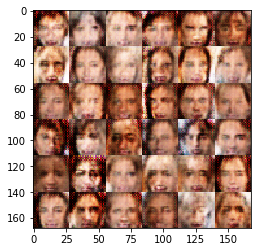

Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.6773
Epoch 1/1... Discriminator Loss: 1.2441... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 1.1495
Epoch 1/1... Discriminator Loss: 1.2709... Generator Loss: 0.8398
Epoch 1/1... Discriminator Loss: 1.3027... Generator Loss: 0.7235
Epoch 1/1... Discriminator Loss: 1.3329... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.5310... Generator Loss: 0.6699
Epoch 1/1... Discriminator Loss: 1.2222... Generator Loss: 1.0556
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.6693
Epoch 1/1... Discriminator Loss: 1.1766... Generator Loss: 1.0890


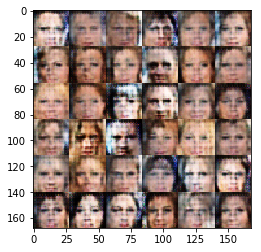

Epoch 1/1... Discriminator Loss: 1.4197... Generator Loss: 0.8569
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.6130
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.7167
Epoch 1/1... Discriminator Loss: 1.3699... Generator Loss: 0.6446
Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.8782
Epoch 1/1... Discriminator Loss: 1.2552... Generator Loss: 0.8776
Epoch 1/1... Discriminator Loss: 1.3859... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.4876... Generator Loss: 2.4538
Epoch 1/1... Discriminator Loss: 1.2694... Generator Loss: 0.8668


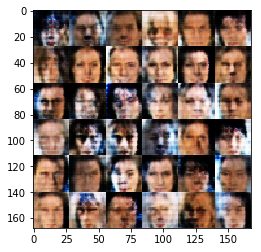

Epoch 1/1... Discriminator Loss: 1.2629... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.3490... Generator Loss: 0.8931
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 0.8769
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.5898... Generator Loss: 0.5586
Epoch 1/1... Discriminator Loss: 1.2912... Generator Loss: 0.7342
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.9086
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.8163


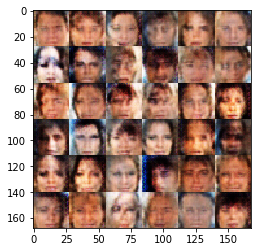

Epoch 1/1... Discriminator Loss: 1.6050... Generator Loss: 0.5056
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.7021
Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.7011
Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.8098
Epoch 1/1... Discriminator Loss: 1.0107... Generator Loss: 1.3201
Epoch 1/1... Discriminator Loss: 1.1692... Generator Loss: 0.7065
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 0.6391
Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 0.6689


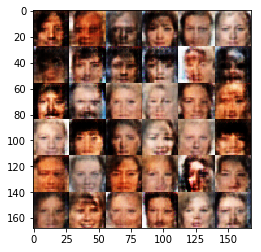

Epoch 1/1... Discriminator Loss: 1.4205... Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.5775
Epoch 1/1... Discriminator Loss: 1.6989... Generator Loss: 0.4444
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.6959
Epoch 1/1... Discriminator Loss: 1.5692... Generator Loss: 0.4895
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.6912
Epoch 1/1... Discriminator Loss: 1.3304... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.8081
Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 0.8709
Epoch 1/1... Discriminator Loss: 1.3761... Generator Loss: 0.6184


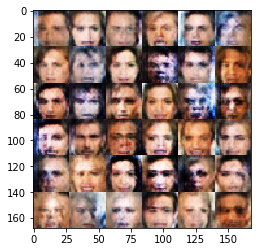

Epoch 1/1... Discriminator Loss: 1.3415... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 0.7454
Epoch 1/1... Discriminator Loss: 1.2259... Generator Loss: 1.0717
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.7505
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.8971
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.7525
Epoch 1/1... Discriminator Loss: 1.2308... Generator Loss: 0.8244


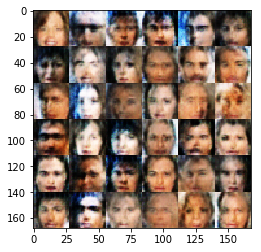

Epoch 1/1... Discriminator Loss: 1.2312... Generator Loss: 0.7983
Epoch 1/1... Discriminator Loss: 1.5435... Generator Loss: 0.6476
Epoch 1/1... Discriminator Loss: 1.6091... Generator Loss: 0.5142
Epoch 1/1... Discriminator Loss: 1.2145... Generator Loss: 0.8276
Epoch 1/1... Discriminator Loss: 1.2392... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.1264... Generator Loss: 1.0032
Epoch 1/1... Discriminator Loss: 1.1981... Generator Loss: 0.8429
Epoch 1/1... Discriminator Loss: 1.2633... Generator Loss: 0.7707
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.3229... Generator Loss: 0.6842


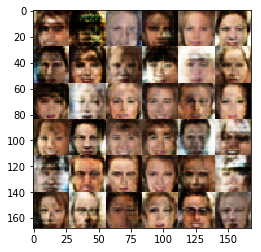

Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.8133
Epoch 1/1... Discriminator Loss: 1.4053... Generator Loss: 0.6865
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.7411
Epoch 1/1... Discriminator Loss: 1.2621... Generator Loss: 0.7494
Epoch 1/1... Discriminator Loss: 1.2172... Generator Loss: 0.8274
Epoch 1/1... Discriminator Loss: 1.2409... Generator Loss: 0.7966
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.7517
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.7245
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.3150... Generator Loss: 1.0662


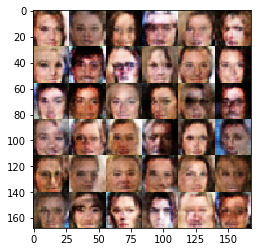

Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.3349... Generator Loss: 0.8304
Epoch 1/1... Discriminator Loss: 0.9388... Generator Loss: 1.0826
Epoch 1/1... Discriminator Loss: 1.4682... Generator Loss: 0.5615
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 1.0896
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.8856
Epoch 1/1... Discriminator Loss: 1.1877... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 1.1810... Generator Loss: 0.9043
Epoch 1/1... Discriminator Loss: 1.2134... Generator Loss: 0.6666


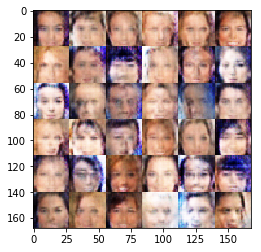

Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.8855
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 1.1273
Epoch 1/1... Discriminator Loss: 1.2807... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 0.8376
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.7296
Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.7702
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.3584... Generator Loss: 0.7806


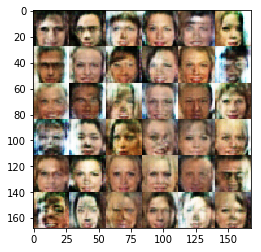

Epoch 1/1... Discriminator Loss: 1.1837... Generator Loss: 0.8457
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.5780
Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 0.8154
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.7593
Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 1.5374... Generator Loss: 0.8874
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.7184
Epoch 1/1... Discriminator Loss: 1.2362... Generator Loss: 0.6846
Epoch 1/1... Discriminator Loss: 1.2456... Generator Loss: 0.8222


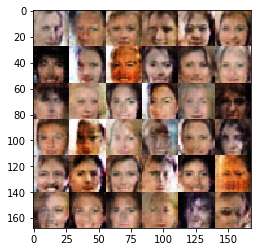

Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 1.1000
Epoch 1/1... Discriminator Loss: 1.3895... Generator Loss: 0.5794
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 0.8714
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.6263
Epoch 1/1... Discriminator Loss: 1.5039... Generator Loss: 0.6540
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.8435
Epoch 1/1... Discriminator Loss: 1.3385... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.1500... Generator Loss: 0.8483


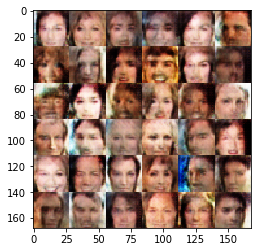

Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.7312
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 1.5043... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.5415... Generator Loss: 0.4979
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 0.7819
Epoch 1/1... Discriminator Loss: 1.2214... Generator Loss: 0.7739
Epoch 1/1... Discriminator Loss: 1.1381... Generator Loss: 0.8049
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.8627


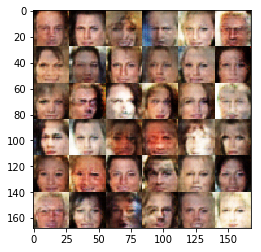

Epoch 1/1... Discriminator Loss: 1.2620... Generator Loss: 0.9134
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.8134
Epoch 1/1... Discriminator Loss: 1.2122... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 1.2623... Generator Loss: 0.9782
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.9097
Epoch 1/1... Discriminator Loss: 1.3520... Generator Loss: 0.8476
Epoch 1/1... Discriminator Loss: 1.3196... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.1376... Generator Loss: 0.7914
Epoch 1/1... Discriminator Loss: 1.4543... Generator Loss: 0.6408
Epoch 1/1... Discriminator Loss: 1.3027... Generator Loss: 0.6961


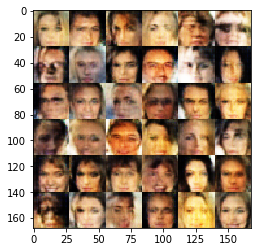

Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.6103
Epoch 1/1... Discriminator Loss: 1.5360... Generator Loss: 0.5871
Epoch 1/1... Discriminator Loss: 1.2394... Generator Loss: 0.7674
Epoch 1/1... Discriminator Loss: 1.3084... Generator Loss: 0.9565
Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.9563
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.7945
Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 0.7624
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.7684
Epoch 1/1... Discriminator Loss: 1.1899... Generator Loss: 1.0649


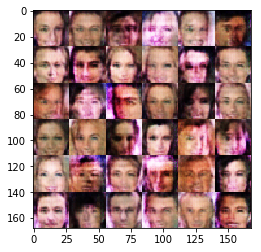

Epoch 1/1... Discriminator Loss: 1.2117... Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 1.2412... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.3784... Generator Loss: 0.7300
Epoch 1/1... Discriminator Loss: 1.3463... Generator Loss: 0.7893
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.7425
Epoch 1/1... Discriminator Loss: 1.5065... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.2944... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.5154... Generator Loss: 0.6137
Epoch 1/1... Discriminator Loss: 1.2221... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.7014


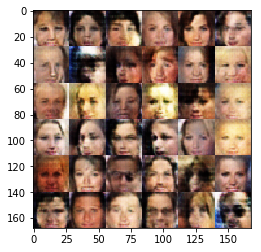

Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.8622
Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.6454
Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 1.1192
Epoch 1/1... Discriminator Loss: 1.3965... Generator Loss: 0.6828
Epoch 1/1... Discriminator Loss: 1.3052... Generator Loss: 0.7764
Epoch 1/1... Discriminator Loss: 1.2325... Generator Loss: 0.9816
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.7993
Epoch 1/1... Discriminator Loss: 1.2084... Generator Loss: 0.7301
Epoch 1/1... Discriminator Loss: 1.4890... Generator Loss: 0.6186
Epoch 1/1... Discriminator Loss: 1.3993... Generator Loss: 0.6061


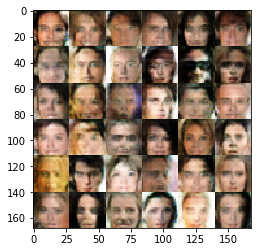

Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.7360
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 0.7108
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 0.7684
Epoch 1/1... Discriminator Loss: 1.1752... Generator Loss: 1.1237
Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 0.8636
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.9025
Epoch 1/1... Discriminator Loss: 1.3395... Generator Loss: 0.6741
Epoch 1/1... Discriminator Loss: 1.3238... Generator Loss: 0.7404


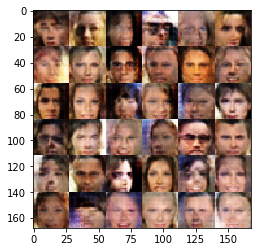

Epoch 1/1... Discriminator Loss: 1.3692... Generator Loss: 0.6179
Epoch 1/1... Discriminator Loss: 1.2344... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.1081... Generator Loss: 0.8301
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.3401... Generator Loss: 0.8164
Epoch 1/1... Discriminator Loss: 1.2674... Generator Loss: 0.7253
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 0.8623
Epoch 1/1... Discriminator Loss: 1.3728... Generator Loss: 0.6420
Epoch 1/1... Discriminator Loss: 1.6406... Generator Loss: 0.4779
Epoch 1/1... Discriminator Loss: 1.2385... Generator Loss: 0.7289


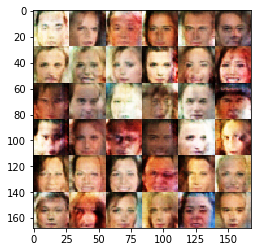

Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.6689
Epoch 1/1... Discriminator Loss: 1.3367... Generator Loss: 0.5882
Epoch 1/1... Discriminator Loss: 1.5050... Generator Loss: 0.6999
Epoch 1/1... Discriminator Loss: 1.3193... Generator Loss: 0.6988
Epoch 1/1... Discriminator Loss: 1.3005... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.2554... Generator Loss: 0.8207
Epoch 1/1... Discriminator Loss: 1.2799... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.6322
Epoch 1/1... Discriminator Loss: 1.4250... Generator Loss: 0.6774


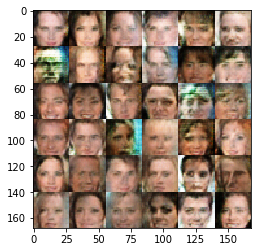

Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.7374
Epoch 1/1... Discriminator Loss: 1.2040... Generator Loss: 0.8142
Epoch 1/1... Discriminator Loss: 1.4413... Generator Loss: 0.5303
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.7880
Epoch 1/1... Discriminator Loss: 1.1534... Generator Loss: 0.9775
Epoch 1/1... Discriminator Loss: 1.3949... Generator Loss: 0.6589
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 0.6890
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.7508
Epoch 1/1... Discriminator Loss: 1.4058... Generator Loss: 0.6117
Epoch 1/1... Discriminator Loss: 1.2462... Generator Loss: 0.8026


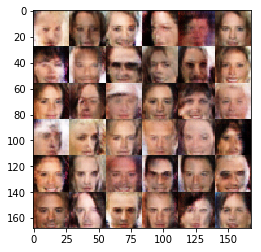

Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.7813
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 0.8848
Epoch 1/1... Discriminator Loss: 1.3102... Generator Loss: 0.6839
Epoch 1/1... Discriminator Loss: 1.2062... Generator Loss: 0.8888
Epoch 1/1... Discriminator Loss: 1.6132... Generator Loss: 0.8892
Epoch 1/1... Discriminator Loss: 1.1549... Generator Loss: 1.1342
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.7384


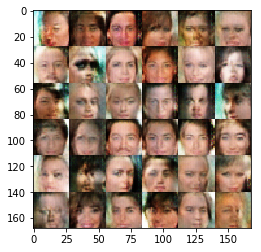

Epoch 1/1... Discriminator Loss: 1.3285... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.2112... Generator Loss: 0.7984
Epoch 1/1... Discriminator Loss: 1.4459... Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 1.1848... Generator Loss: 0.7188
Epoch 1/1... Discriminator Loss: 1.3170... Generator Loss: 0.7535
Epoch 1/1... Discriminator Loss: 1.3446... Generator Loss: 0.7465
Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.3598... Generator Loss: 0.7273
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 1.4090... Generator Loss: 0.5587


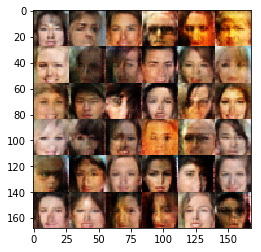

Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.8089
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.3583... Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.7112
Epoch 1/1... Discriminator Loss: 1.2605... Generator Loss: 0.9405
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.2551... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.2443... Generator Loss: 0.7719
Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 0.8686
Epoch 1/1... Discriminator Loss: 1.2642... Generator Loss: 0.9578


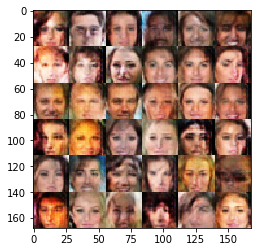

Epoch 1/1... Discriminator Loss: 1.2533... Generator Loss: 0.8480
Epoch 1/1... Discriminator Loss: 1.3145... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.8859
Epoch 1/1... Discriminator Loss: 1.2549... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 1.1904... Generator Loss: 0.9226
Epoch 1/1... Discriminator Loss: 1.2778... Generator Loss: 0.7959
Epoch 1/1... Discriminator Loss: 1.1915... Generator Loss: 0.9745
Epoch 1/1... Discriminator Loss: 1.2592... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.5591
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 0.7095


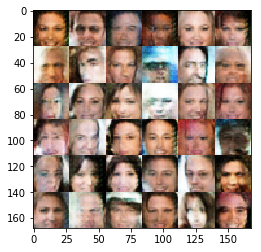

Epoch 1/1... Discriminator Loss: 1.5801... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.2717... Generator Loss: 0.8777
Epoch 1/1... Discriminator Loss: 1.3275... Generator Loss: 0.8131
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.7807
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.7403
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.8289
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 0.6737
Epoch 1/1... Discriminator Loss: 1.2435... Generator Loss: 0.7887
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.5979
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.7395


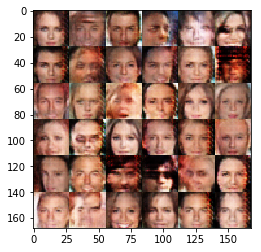

Epoch 1/1... Discriminator Loss: 1.3483... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.7867
Epoch 1/1... Discriminator Loss: 1.4668... Generator Loss: 0.6590
Epoch 1/1... Discriminator Loss: 1.2178... Generator Loss: 0.8286
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 0.9610
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.5691... Generator Loss: 0.5739
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.8984
Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.6812


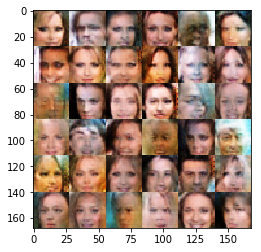

Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.2864... Generator Loss: 0.7757
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.4959... Generator Loss: 0.8320
Epoch 1/1... Discriminator Loss: 1.4006... Generator Loss: 0.7364
Epoch 1/1... Discriminator Loss: 1.0537... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.8039
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.7313
Epoch 1/1... Discriminator Loss: 1.3692... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.8470


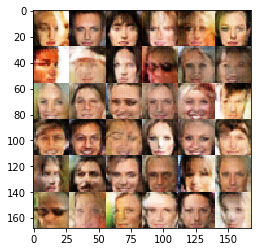

Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.7612
Epoch 1/1... Discriminator Loss: 1.3428... Generator Loss: 0.6149
Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.1943... Generator Loss: 0.9684
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.7928
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.6194
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.9383
Epoch 1/1... Discriminator Loss: 1.3260... Generator Loss: 0.8489
Epoch 1/1... Discriminator Loss: 1.3073... Generator Loss: 0.6996


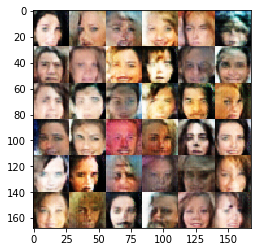

Epoch 1/1... Discriminator Loss: 1.3102... Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.6797
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.9399
Epoch 1/1... Discriminator Loss: 1.4591... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 1.5569... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 1.2701... Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.7061
Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.7539


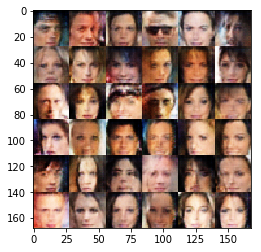

Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.8904
Epoch 1/1... Discriminator Loss: 1.5369... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.2174... Generator Loss: 0.8022
Epoch 1/1... Discriminator Loss: 1.1179... Generator Loss: 0.9497
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.6949
Epoch 1/1... Discriminator Loss: 1.2864... Generator Loss: 0.7985
Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.6184
Epoch 1/1... Discriminator Loss: 1.2873... Generator Loss: 0.8559
Epoch 1/1... Discriminator Loss: 1.1626... Generator Loss: 0.7434


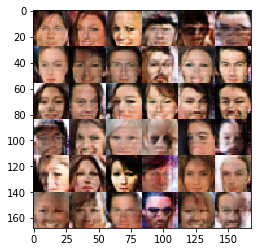

Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.6522
Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.6564
Epoch 1/1... Discriminator Loss: 1.3012... Generator Loss: 0.7435
Epoch 1/1... Discriminator Loss: 1.2595... Generator Loss: 0.7541
Epoch 1/1... Discriminator Loss: 1.3209... Generator Loss: 0.7020
Epoch 1/1... Discriminator Loss: 1.2781... Generator Loss: 0.8226
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.7685


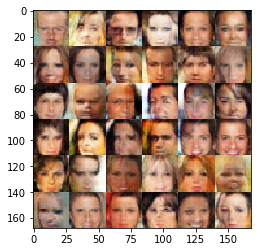

Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.7179
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 1.1908... Generator Loss: 0.8961
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.7058
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.6927
Epoch 1/1... Discriminator Loss: 1.2146... Generator Loss: 0.8893
Epoch 1/1... Discriminator Loss: 1.2533... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.7274


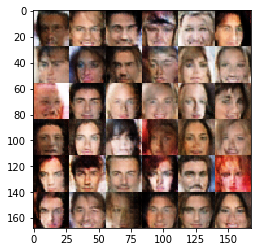

Epoch 1/1... Discriminator Loss: 1.4147... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.4043... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.2242... Generator Loss: 0.8797
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.5429... Generator Loss: 0.6831
Epoch 1/1... Discriminator Loss: 1.1173... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 1.2179... Generator Loss: 0.7913
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 1.0270
Epoch 1/1... Discriminator Loss: 0.8294... Generator Loss: 1.2465


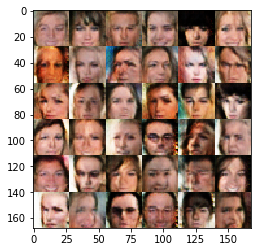

Epoch 1/1... Discriminator Loss: 1.5769... Generator Loss: 0.5684
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 1.5029... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 1.5288... Generator Loss: 0.5310
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.8623
Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.6491
Epoch 1/1... Discriminator Loss: 1.4542... Generator Loss: 0.6366
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.6338


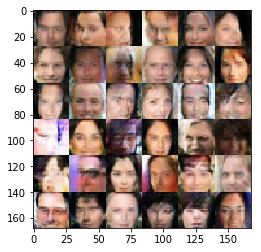

Epoch 1/1... Discriminator Loss: 1.2004... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 0.7389
Epoch 1/1... Discriminator Loss: 1.3108... Generator Loss: 0.8741
Epoch 1/1... Discriminator Loss: 1.3425... Generator Loss: 0.6435
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 0.7066
Epoch 1/1... Discriminator Loss: 1.3278... Generator Loss: 0.6601
Epoch 1/1... Discriminator Loss: 1.2706... Generator Loss: 0.8064
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.7220
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.7831


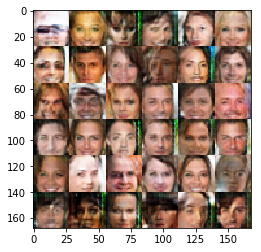

Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.7827
Epoch 1/1... Discriminator Loss: 1.2144... Generator Loss: 0.9124
Epoch 1/1... Discriminator Loss: 1.3216... Generator Loss: 0.7517
Epoch 1/1... Discriminator Loss: 1.3893... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.4336... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 0.6971
Epoch 1/1... Discriminator Loss: 1.2899... Generator Loss: 1.0042
Epoch 1/1... Discriminator Loss: 1.2159... Generator Loss: 0.7170
Epoch 1/1... Discriminator Loss: 1.3402... Generator Loss: 0.6645


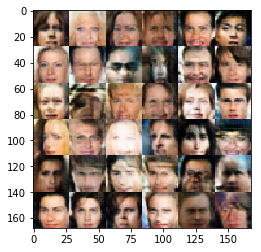

Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.6967
Epoch 1/1... Discriminator Loss: 1.3183... Generator Loss: 0.7131
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.7324
Epoch 1/1... Discriminator Loss: 1.4577... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.3125... Generator Loss: 0.7368
Epoch 1/1... Discriminator Loss: 1.3093... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.2975... Generator Loss: 0.7501
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.7022
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.8431
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.8604


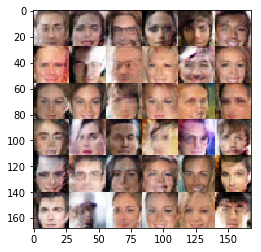

Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.7167
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.6679
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 0.7245
Epoch 1/1... Discriminator Loss: 1.3446... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.7046
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.8469
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.7153
Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 0.6005
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.9639


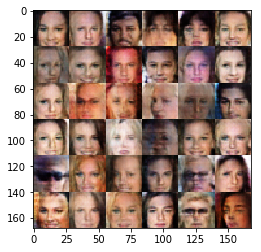

Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.6299
Epoch 1/1... Discriminator Loss: 1.3002... Generator Loss: 0.6893
Epoch 1/1... Discriminator Loss: 1.3101... Generator Loss: 0.7461
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.6666
Epoch 1/1... Discriminator Loss: 1.2204... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.3560... Generator Loss: 0.9060
Epoch 1/1... Discriminator Loss: 1.1930... Generator Loss: 0.7888
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.2893... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.2218... Generator Loss: 0.8611


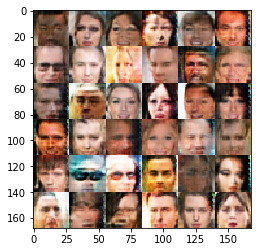

Epoch 1/1... Discriminator Loss: 1.2604... Generator Loss: 0.7632
Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.4379... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 1.1479... Generator Loss: 0.8413
Epoch 1/1... Discriminator Loss: 1.2581... Generator Loss: 0.7304
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.6915
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.3131... Generator Loss: 0.8263


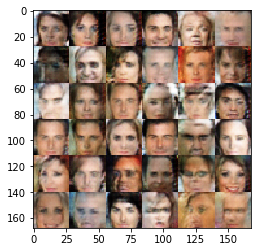

Epoch 1/1... Discriminator Loss: 1.4316... Generator Loss: 0.6476
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.7031
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.6121
Epoch 1/1... Discriminator Loss: 1.4405... Generator Loss: 0.6089
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 0.8670
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.7582
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 1.0175
Epoch 1/1... Discriminator Loss: 1.3012... Generator Loss: 0.9524
Epoch 1/1... Discriminator Loss: 1.2418... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.7465


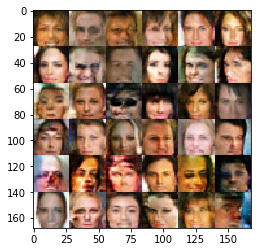

Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.6616
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.8095
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 0.9030
Epoch 1/1... Discriminator Loss: 1.4771... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.4111... Generator Loss: 0.7030
Epoch 1/1... Discriminator Loss: 1.3386... Generator Loss: 0.7513
Epoch 1/1... Discriminator Loss: 1.2504... Generator Loss: 0.7143
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.6411


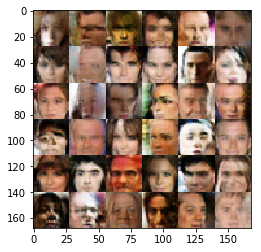

Epoch 1/1... Discriminator Loss: 1.3623... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.3187... Generator Loss: 0.7292
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.6527
Epoch 1/1... Discriminator Loss: 1.3619... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.2611... Generator Loss: 0.6897
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 0.8586
Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 1.0376
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.8839
Epoch 1/1... Discriminator Loss: 1.4687... Generator Loss: 0.6902


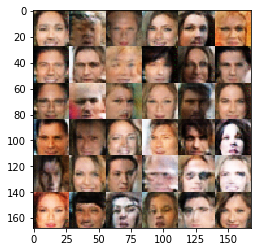

Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 1.4876... Generator Loss: 0.6083
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 0.7699
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.7500
Epoch 1/1... Discriminator Loss: 1.2918... Generator Loss: 0.8098
Epoch 1/1... Discriminator Loss: 1.3294... Generator Loss: 0.8805
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.6273
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.6933
Epoch 1/1... Discriminator Loss: 1.3243... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 1.3049... Generator Loss: 0.7170


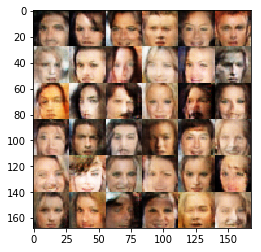

Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.7126
Epoch 1/1... Discriminator Loss: 1.4020... Generator Loss: 0.6388
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.6193
Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 0.6780
Epoch 1/1... Discriminator Loss: 1.3941... Generator Loss: 0.6402
Epoch 1/1... Discriminator Loss: 1.3654... Generator Loss: 0.6162
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.2567... Generator Loss: 0.7747
Epoch 1/1... Discriminator Loss: 1.3074... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.3995... Generator Loss: 0.6637


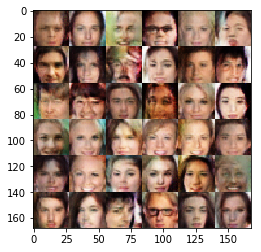

Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.9194
Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 1.3536... Generator Loss: 0.7025
Epoch 1/1... Discriminator Loss: 1.1706... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 1.3123... Generator Loss: 0.7788
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 1.4783... Generator Loss: 0.5896
Epoch 1/1... Discriminator Loss: 1.3448... Generator Loss: 0.6602
Epoch 1/1... Discriminator Loss: 1.2951... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.3827... Generator Loss: 0.7763


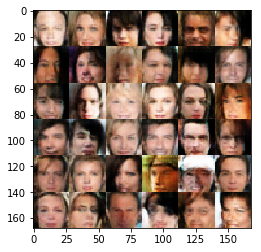

Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 0.7074
Epoch 1/1... Discriminator Loss: 1.1549... Generator Loss: 0.8330
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.8385
Epoch 1/1... Discriminator Loss: 1.1964... Generator Loss: 0.9228
Epoch 1/1... Discriminator Loss: 1.4554... Generator Loss: 0.6407
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.4556... Generator Loss: 0.8710
Epoch 1/1... Discriminator Loss: 1.3571... Generator Loss: 0.6864
Epoch 1/1... Discriminator Loss: 1.2124... Generator Loss: 0.8271
Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 0.7470


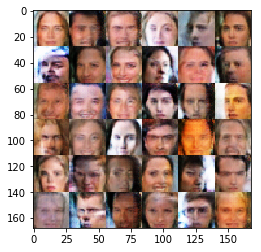

Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.8544
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 0.8309
Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.6124
Epoch 1/1... Discriminator Loss: 1.4143... Generator Loss: 0.6217
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.7618
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.4269... Generator Loss: 0.6663
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6941
Epoch 1/1... Discriminator Loss: 1.2769... Generator Loss: 0.6654


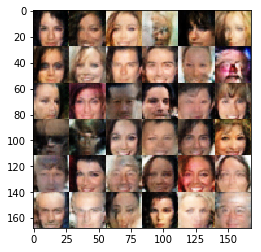

Epoch 1/1... Discriminator Loss: 1.4816... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.3127... Generator Loss: 0.9854
Epoch 1/1... Discriminator Loss: 1.3930... Generator Loss: 0.7131
Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.8448
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.8017
Epoch 1/1... Discriminator Loss: 1.2636... Generator Loss: 0.7908
Epoch 1/1... Discriminator Loss: 1.1881... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.8983
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.6631
Epoch 1/1... Discriminator Loss: 1.2776... Generator Loss: 0.7831


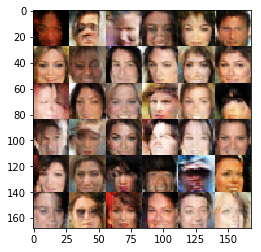

Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.6111
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 0.7498
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.7794
Epoch 1/1... Discriminator Loss: 1.2597... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.6790
Epoch 1/1... Discriminator Loss: 1.3184... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 1.2818... Generator Loss: 0.7786
Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.7054
Epoch 1/1... Discriminator Loss: 1.4518... Generator Loss: 0.5588


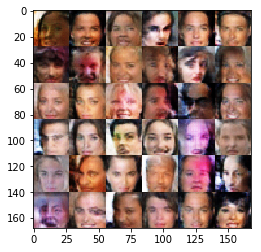

Epoch 1/1... Discriminator Loss: 1.2682... Generator Loss: 0.7005
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.8213
Epoch 1/1... Discriminator Loss: 1.4203... Generator Loss: 0.6013


In [28]:
batch_size = 32
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.